Imports

In [97]:
# Importando bibliotecas essenciais para análise de dados e machine learning
import pandas as pd  # Manipulação e análise de dados
import numpy as np  # Operações matemáticas e manipulação de arrays

# Visualização de dados
import matplotlib.pyplot as plt  # Criação de gráficos
import seaborn as sns  # Visualização estatística

# Pré-processamento de dados
from sklearn.model_selection import train_test_split  # Divisão de dados em treino e teste
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  # Escalonamento e codificação

# Modelagem e avaliação
from sklearn.linear_model import LinearRegression, LogisticRegression  # Modelos de regressão
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Modelos baseados em árvores
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix  # Métricas de avaliação

from IPython.display import display
import unicodedata


In [98]:
def normalizar_texto(texto):
    if isinstance(texto, str):
        texto = texto.strip().upper()
        texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')
        return texto
    else:
        return texto  # Retorna como está se não for string (ex: NaN)
    
df_aeronave = pd.read_csv("aeronave.csv", encoding='latin1', sep=';')
df_fator = pd.read_csv("fator_contribuinte.csv", encoding='latin1', sep=';')
df_recomendacao = pd.read_csv("recomendacao.csv", encoding='latin1', sep=';')
df_tipo = pd.read_csv("ocorrencia_tipo.csv", encoding='latin1', sep=';')
df_ocorrencia = pd.read_csv("ocorrencia.csv", encoding='latin1', sep=';')

df_merged = df_ocorrencia.merge(df_aeronave, on='codigo_ocorrencia2', how='left')
df_merged = df_merged.merge(df_fator, on='codigo_ocorrencia3', how='left')
df_merged = df_merged.merge(df_recomendacao, on='codigo_ocorrencia4', how='left')
df_merged = df_merged.merge(df_tipo, on='codigo_ocorrencia1', how='left')

display("Colunas do DataFrame:")
display(df_merged.columns)

display("Tipos de dados de cada coluna:")
display(df_merged.dtypes)

df_merged = df_merged.drop(columns=['codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4','ocorrencia_pais'])
display("Primeiras linhas do DataFrame:")
display(df_merged.head())


# Colunas categóricas (tipos object ou string)
colunas_categoricas = df_merged.select_dtypes(include=['object']).columns.tolist()
print("Colunas categóricas:")
print(colunas_categoricas)

# Colunas discretas (tipos int, excluindo identificadores e códigos)
possiveis_ids = ['codigo_ocorrencia']
colunas_numericas = [
    col for col in df_merged.select_dtypes(include=['int', 'int64']).columns
    if col not in possiveis_ids
]
print("\nColunas numéricas:")
print(colunas_numericas)

for col in colunas_categoricas:
    df_merged[col] = df_merged[col].apply(normalizar_texto)


    # Substituir "NI12O" por "NAO" em todas as colunas do df_merged
df_merged.replace("NI12O", "NAO", inplace=True)
# Substituir ocorrências de "***" ou "*** COLISÃO EM VOO COM OBSTÁCULO (excluir)" por NaN em todas as colunas do df_merged
df_merged.replace(
    to_replace=[r'^\*\*\*$', r'^\*\*\* COLISÃO EM VOO COM OBSTÁCULO \(excluir\)$'],
    value=np.nan,
    regex=True,
    inplace=True
)


'Colunas do DataFrame:'

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_classificacao',
       'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo',
       'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
       'total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista', 'aeronave_matricula',
       'aeronave_operador_categoria', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_pmd_categoria', 'aeronave_assentos',
       'aeronave_ano_fabricacao', 'aeronave_pais_fabricante',
       'aeronave_pais_registro', 'aeronave_registro_catego

'Tipos de dados de cada coluna:'

codigo_ocorrencia                    int64
codigo_ocorrencia1                   int64
codigo_ocorrencia2                   int64
codigo_ocorrencia3                   int64
codigo_ocorrencia4                   int64
ocorrencia_classificacao            object
ocorrencia_latitude                 object
ocorrencia_longitude                object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_pais                     object
ocorrencia_aerodromo                object
ocorrencia_dia                      object
ocorrencia_hora                     object
investigacao_aeronave_liberada      object
investigacao_status                 object
divulgacao_relatorio_numero         object
divulgacao_relatorio_publicado      object
divulgacao_dia_publicacao           object
total_recomendacoes                  int64
total_aeronaves_envolvidas           int64
ocorrencia_saida_pista              object
aeronave_matricula                  object
aeronave_op

'Primeiras linhas do DataFrame:'

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,...,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,86954,ACIDENTE,-29.08555569444,-53.86555555555,TUPANCIRETï¿½,RS,SIPJ,04/04/2025,17:20:00,Nï¿½O,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL
1,86953,ACIDENTE,-9.596944444444,-35.96972222222,PILAR,AL,FAER,04/04/2025,09:05:00,SIM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALHA OU MAU FUNCIONAMENTO DO MOTOR,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP
2,86952,INCIDENTE,-2.586944444444,-44.23611111111,Sï¿½O LUï¿½S,MA,SBSL,03/04/2025,20:45:00,SIM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
3,86951,INCIDENTE GRAVE,-27.13388888888,-52.65888888888,CHAPECï¿½,SC,SBCH,31/03/2025,22:30:00,SIM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE
4,86950,INCIDENTE,-23.43555555555,-46.47305555555,GUARULHOS,SP,SBGR,05/04/2025,11:00:00,SIM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COLISÃO COM AVE,COLISÃO COM AVE,BIRD


Colunas categóricas:
['ocorrencia_classificacao', 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_aerodromo', 'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada', 'investigacao_status', 'divulgacao_relatorio_numero', 'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao', 'ocorrencia_saida_pista', 'aeronave_matricula', 'aeronave_operador_categoria', 'aeronave_tipo_veiculo', 'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao', 'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pais_fabricante', 'aeronave_pais_registro', 'aeronave_registro_categoria', 'aeronave_registro_segmento', 'aeronave_voo_origem', 'aeronave_voo_destino', 'aeronave_fase_operacao', 'aeronave_tipo_operacao', 'aeronave_nivel_dano', 'fator_nome', 'fator_aspecto', 'fator_condicionante', 'fator_area', 'recomendacao_numero', 'recomendacao_dia_assinatura', 'recomendacao_dia_encaminhamento', 'recomendacao_dia_feedback', 'recomenda

In [99]:
print("\nValores nulos em cada coluna (%):")
display((df_merged.isnull().mean()).sort_values(ascending=False) * 100)
print("\nValores únicos em cada coluna (%):")
display((df_merged.nunique() / len(df_merged) ).sort_values(ascending=False) * 100)



Valores nulos em cada coluna (%):


aeronave_operador_categoria        92.788653
recomendacao_dia_feedback          48.875136
recomendacao_status                48.072990
fator_condicionante                39.188292
recomendacao_numero                37.884140
recomendacao_dia_encaminhamento    37.884140
recomendacao_destinatario_sigla    37.884140
recomendacao_conteudo              37.884140
recomendacao_dia_assinatura        37.884140
recomendacao_destinatario          37.884140
fator_aspecto                      30.526707
fator_area                         30.526707
fator_nome                         30.526707
divulgacao_dia_publicacao          29.636909
divulgacao_relatorio_numero        26.885176
ocorrencia_longitude               20.842519
ocorrencia_latitude                20.837207
aeronave_registro_segmento          9.779808
aeronave_assentos                   3.537943
aeronave_motor_tipo                 3.476852
aeronave_tipo_icao                  3.434354
aeronave_tipo_operacao              3.102340
aeronave_a


Valores únicos em cada coluna (%):


codigo_ocorrencia                  34.627746
aeronave_matricula                 18.011103
ocorrencia_dia                     13.567425
ocorrencia_longitude                9.843555
ocorrencia_latitude                 9.824962
recomendacao_numero                 8.446439
recomendacao_conteudo               8.310978
divulgacao_relatorio_numero         7.652262
ocorrencia_cidade                   3.787617
ocorrencia_hora                     3.333422
aeronave_modelo                     2.897819
aeronave_voo_origem                 2.520651
recomendacao_dia_feedback           2.510027
aeronave_voo_destino                2.499402
ocorrencia_aerodromo                1.989429
aeronave_pmd                        1.784908
aeronave_pmd_categoria              1.784908
recomendacao_dia_encaminhamento     1.110255
recomendacao_dia_assinatura         0.940264
divulgacao_dia_publicacao           0.913703
aeronave_fabricante                 0.900422
aeronave_tipo_icao                  0.815427
recomendac

In [100]:
# Exibir os valores únicos de cada coluna categórica
for coluna in colunas_categoricas:
    print(f"\nColuna: {coluna}")
    print(df_merged[coluna].unique())


Coluna: ocorrencia_classificacao
['ACIDENTE' 'INCIDENTE' 'INCIDENTE GRAVE']

Coluna: ocorrencia_latitude
['-29.08555569444' '-9.596944444444' '-2.586944444444' ...
 '-17.2541666667' '-23.3444444444' '-22.2180555556']

Coluna: ocorrencia_longitude
['-53.86555555555' '-35.96972222222' '-44.23611111111' ...
 '-43.8536111111' '-51.0633333333' '-47.1763888889']

Coluna: ocorrencia_cidade
['TUPANCIRETI12' 'PILAR' 'SI12O LUI12S' ... 'FERROS' 'ARCOVERDE'
 'BOCAII12VA']

Coluna: ocorrencia_uf
['RS' 'AL' 'MA' 'SC' 'SP' 'RJ' 'ES' 'DF' 'GO' 'MT' 'PR' 'AM' 'PE' 'MG'
 'RR' 'CE' 'BA' 'TO' 'RO' 'PA' 'RN' 'MS' 'AP' nan 'AC' 'PI' 'SE' 'PB']

Coluna: ocorrencia_aerodromo
['SIPJ' 'FAER' 'SBSL' 'SBCH' 'SBGR' 'SBGL' 'SBMI' 'SIVU' 'SBBR' 'SBGO'
 'SBKP' 'SBCT' 'SBCY' 'SBTF' 'SBFI' 'SD6X' 'SBPA' 'SBFZ' 'SBVT' 'SBPS'
 'SDVG' 'SWGN' 'SBRP' 'SBSP' 'SBSV' 'SD2D' 'SBCF' 'SBPG' 'SBME' 'SWPF'
 'SBNM' 'SBMT' 'SBML' 'SBNV' 'SBJR' 'SBSI' 'SBJV' 'SBBE' 'SBNF' 'SBRF'
 'SBSG' 'SBPF' 'SBUL' 'SWFN' 'SNJL' 'SBFS' 'SJGU' 'SBB

In [101]:
# Exibir os valores únicos de cada coluna numéricas
for coluna in colunas_numericas:
    print(f"\nColuna: {coluna}")
    print(df_merged[coluna].unique())


Coluna: total_recomendacoes
[ 0  2  1  4  3  5  7  6  8  9 12 13 11 20 23 10 19 18 14 22 15 29 16 83]

Coluna: total_aeronaves_envolvidas
[1 2 0 3 4]


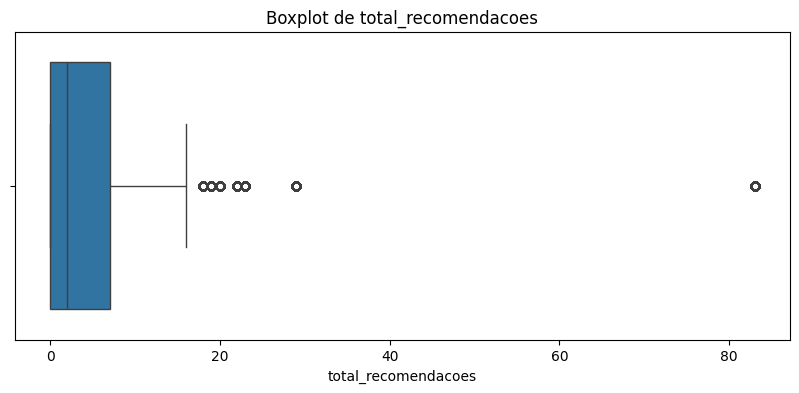

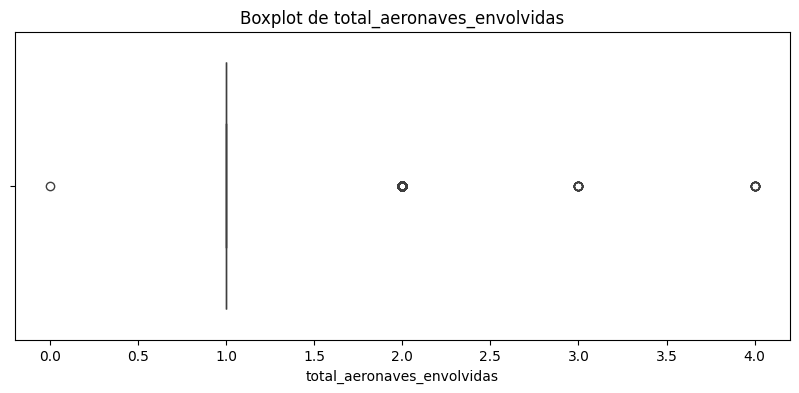

In [102]:
#Boxplots para Outliers: Verificação visual de outliers em variáveis numéricas.
for col in colunas_numericas:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_merged[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

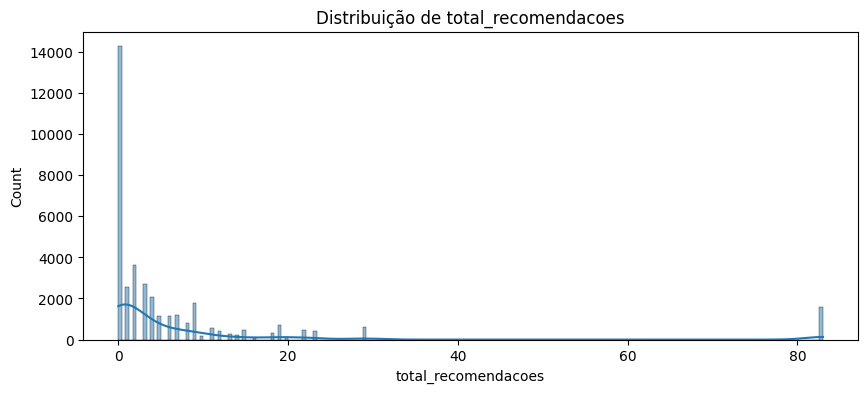

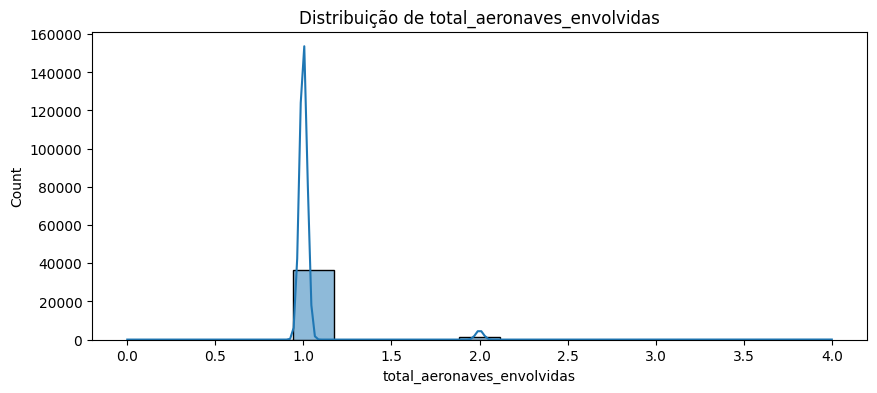

In [103]:
#Distribuição de Variáveis Numéricas: Vamos visualizar como os dados numéricos estão distribuídos e detectar possíveis outliers.
for col in colunas_numericas:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_merged[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()

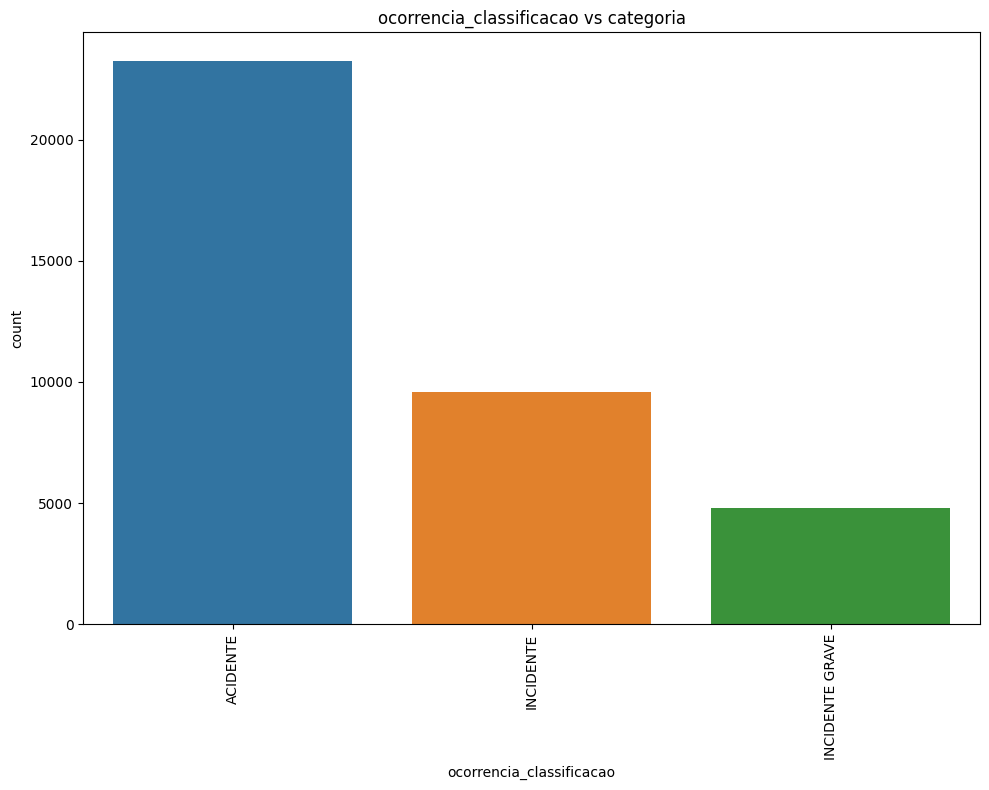

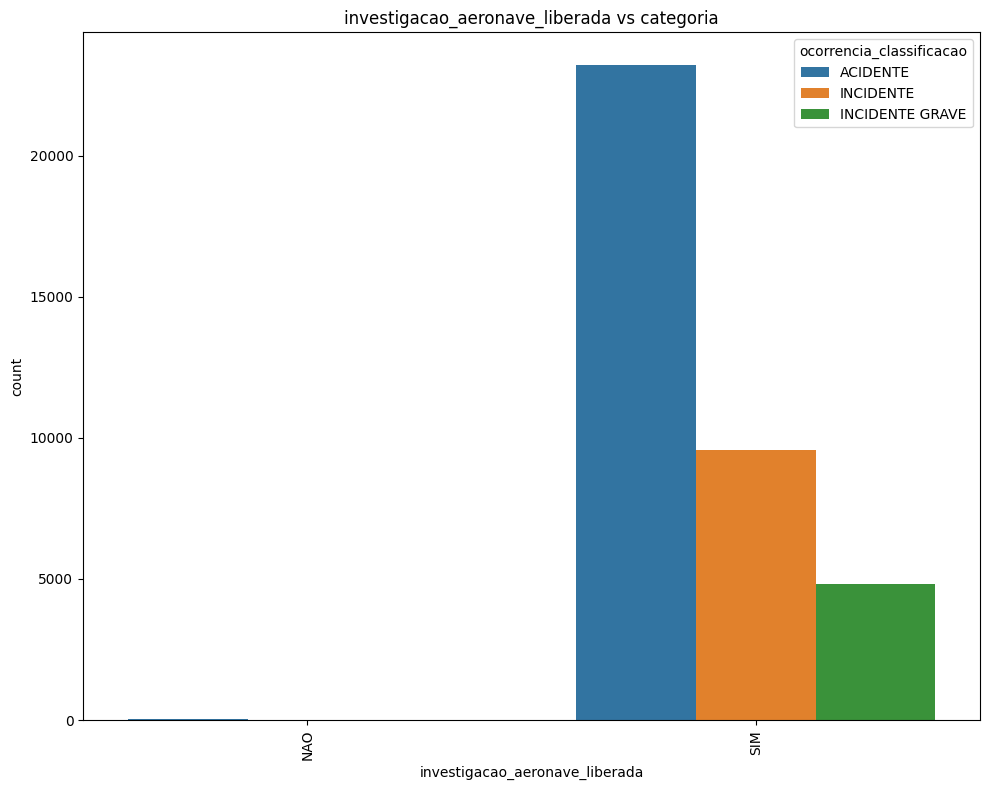

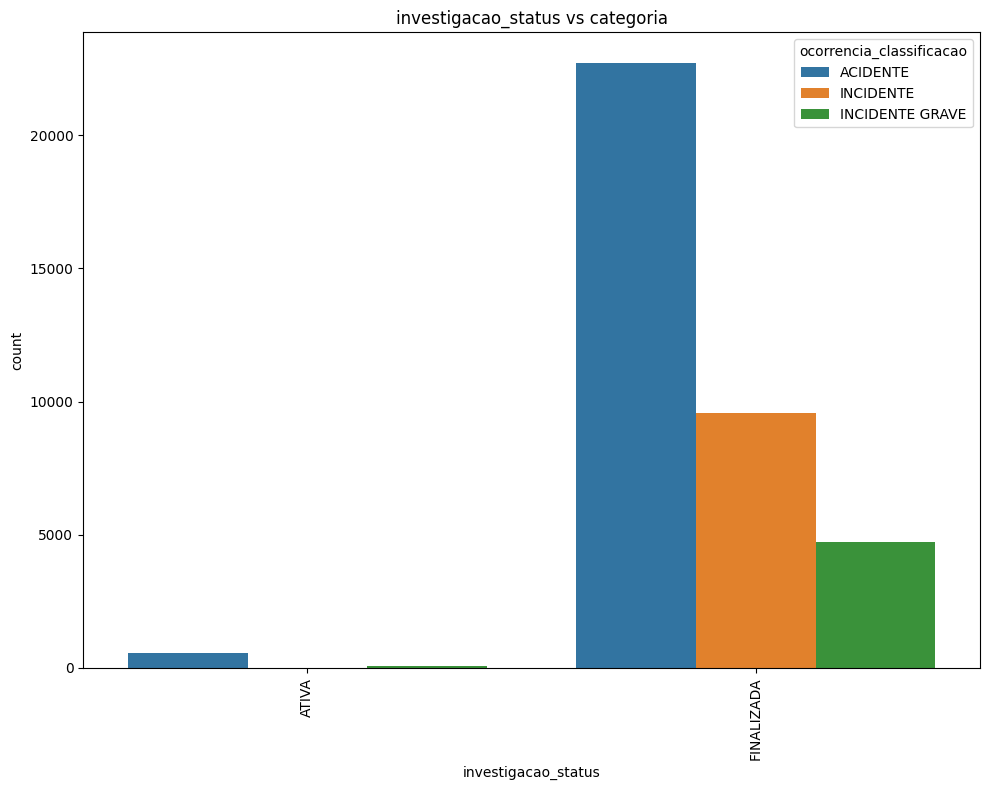

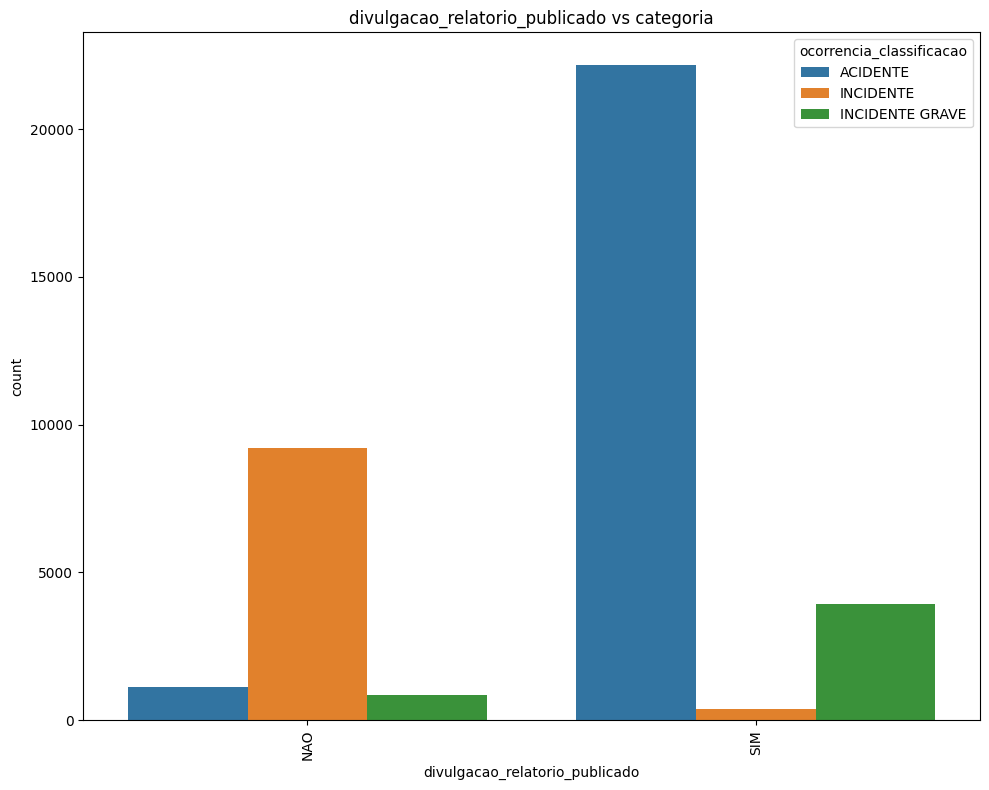

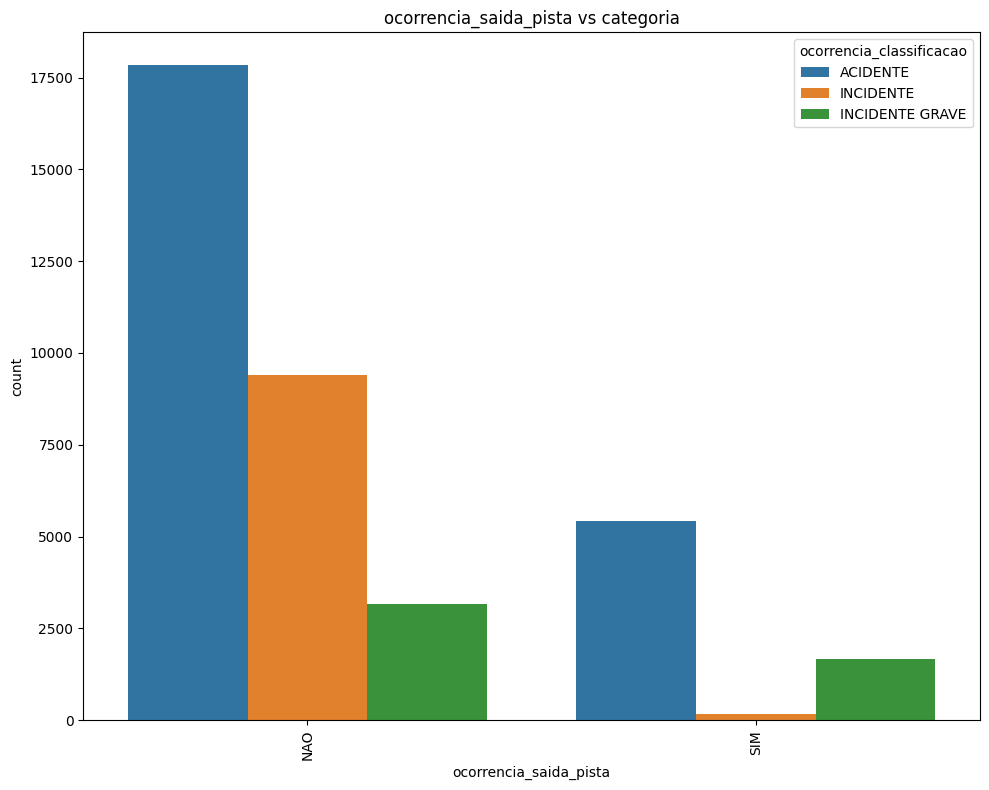

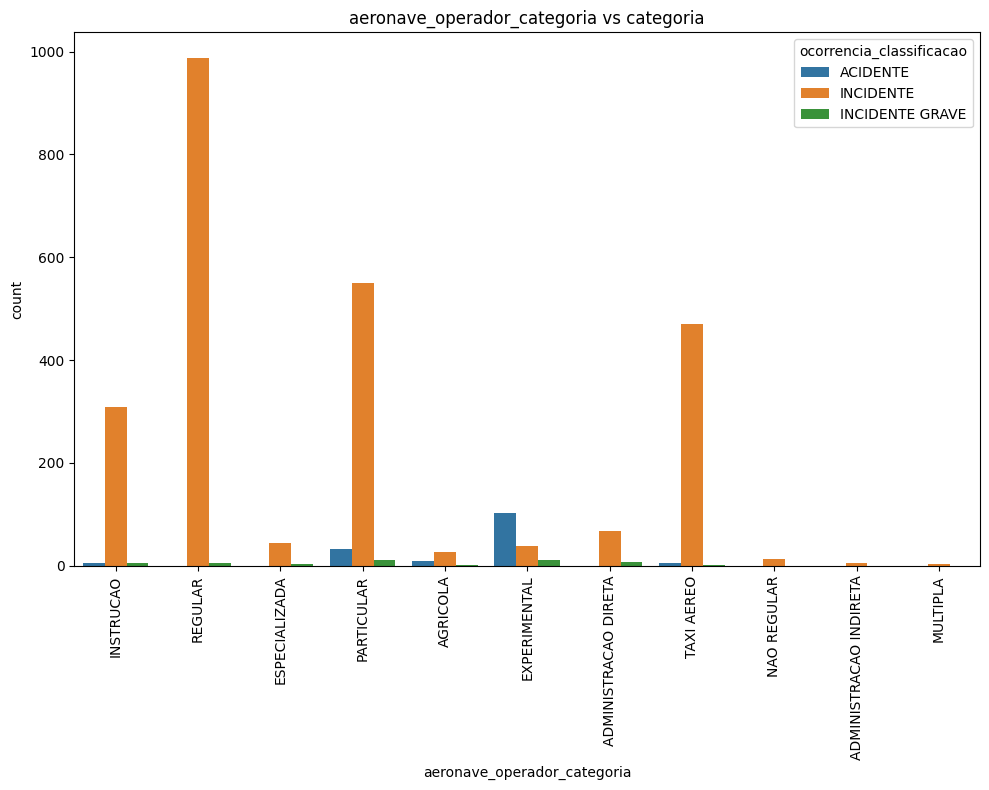

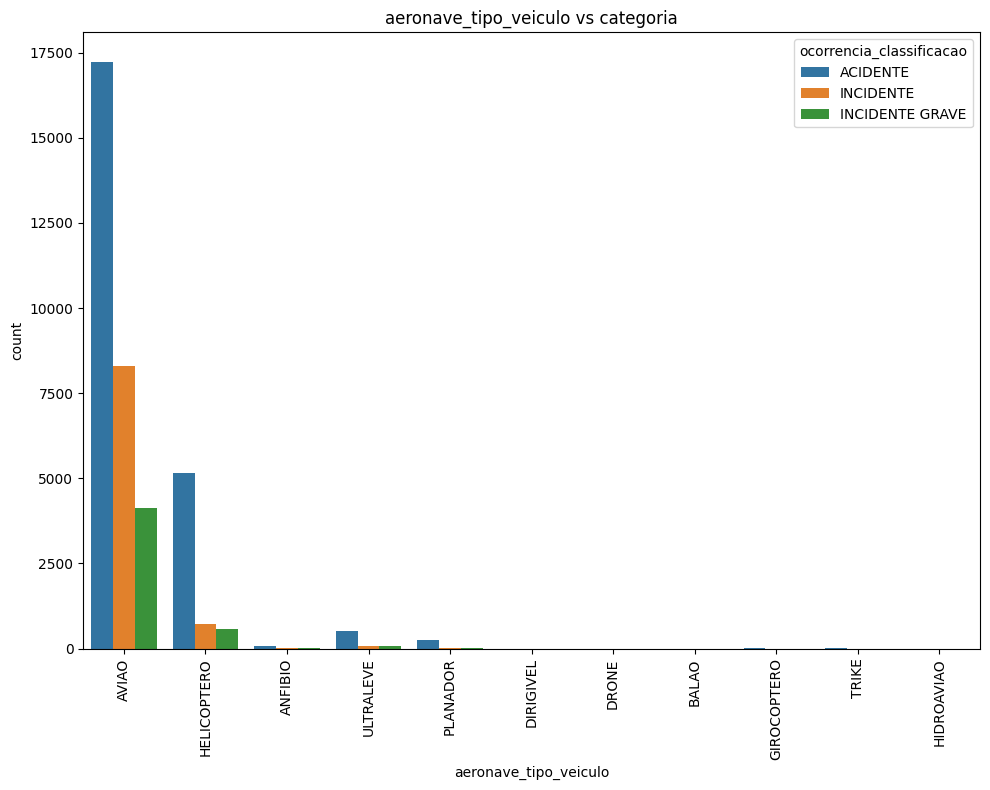

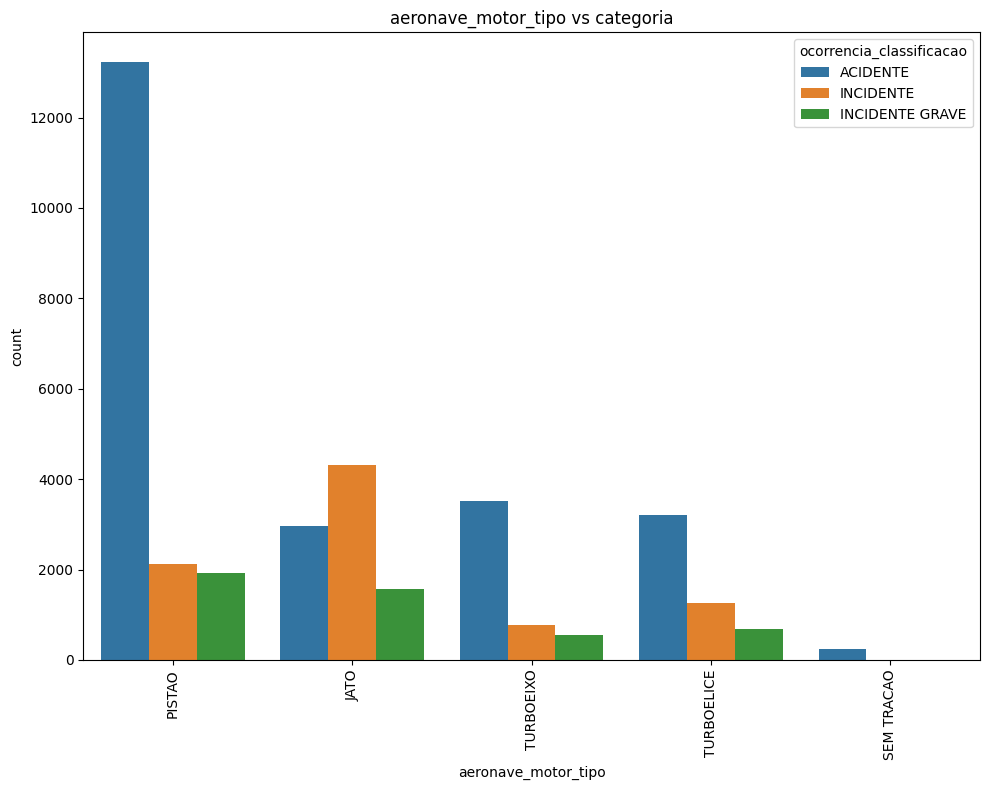

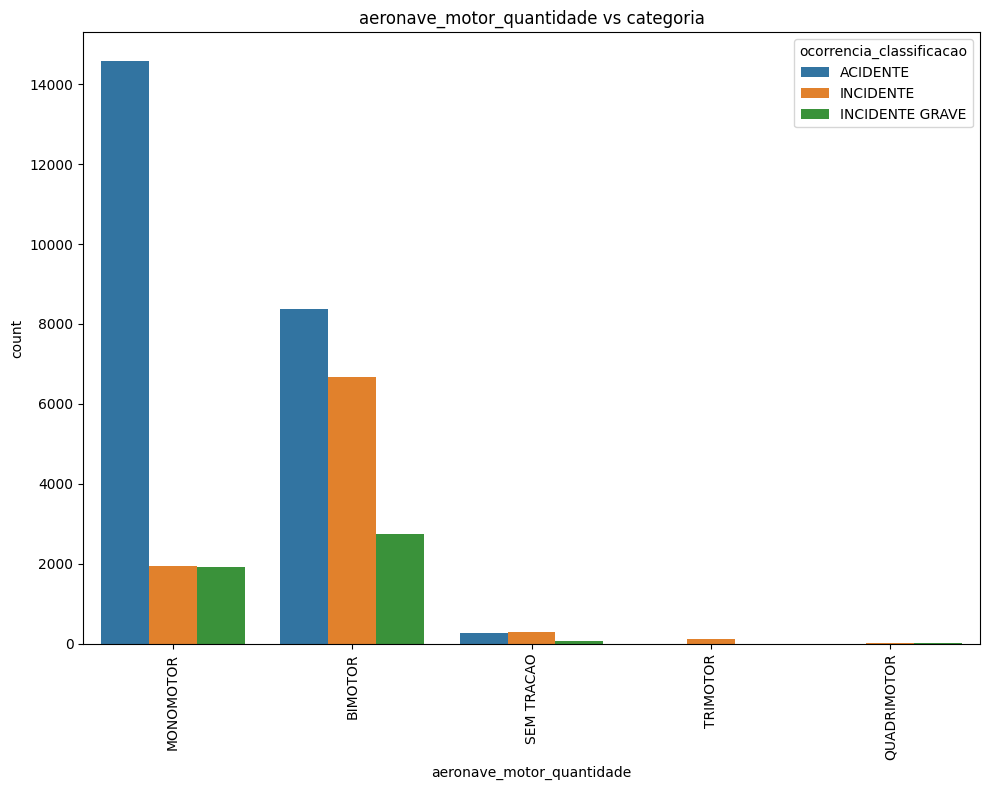

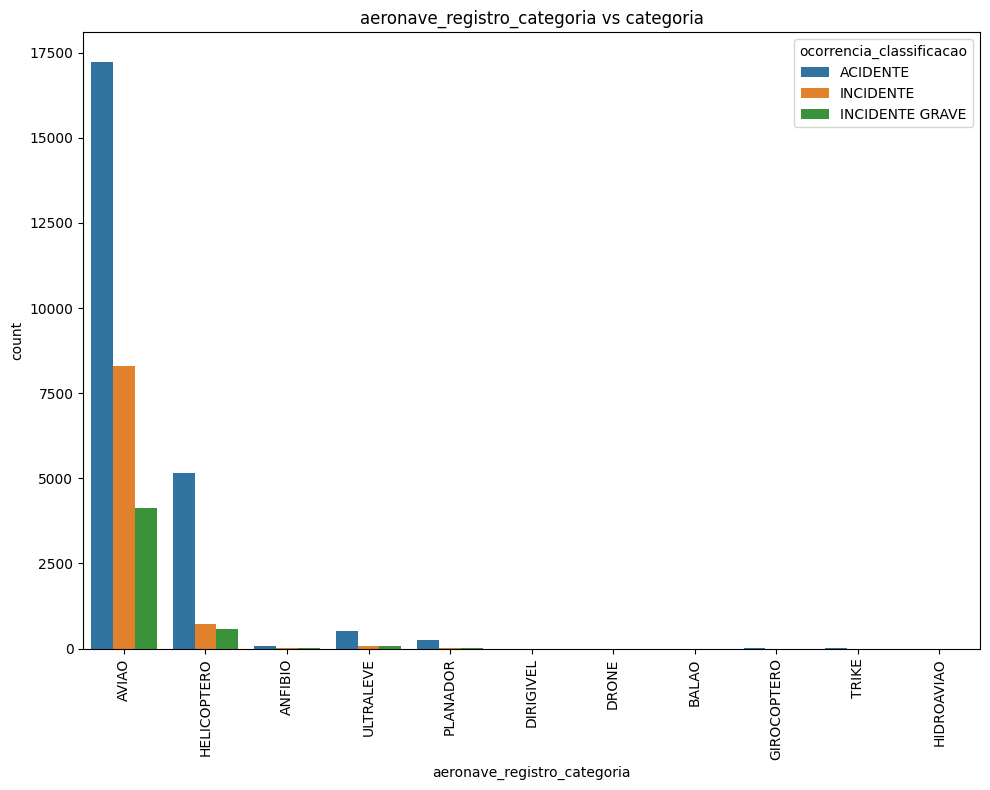

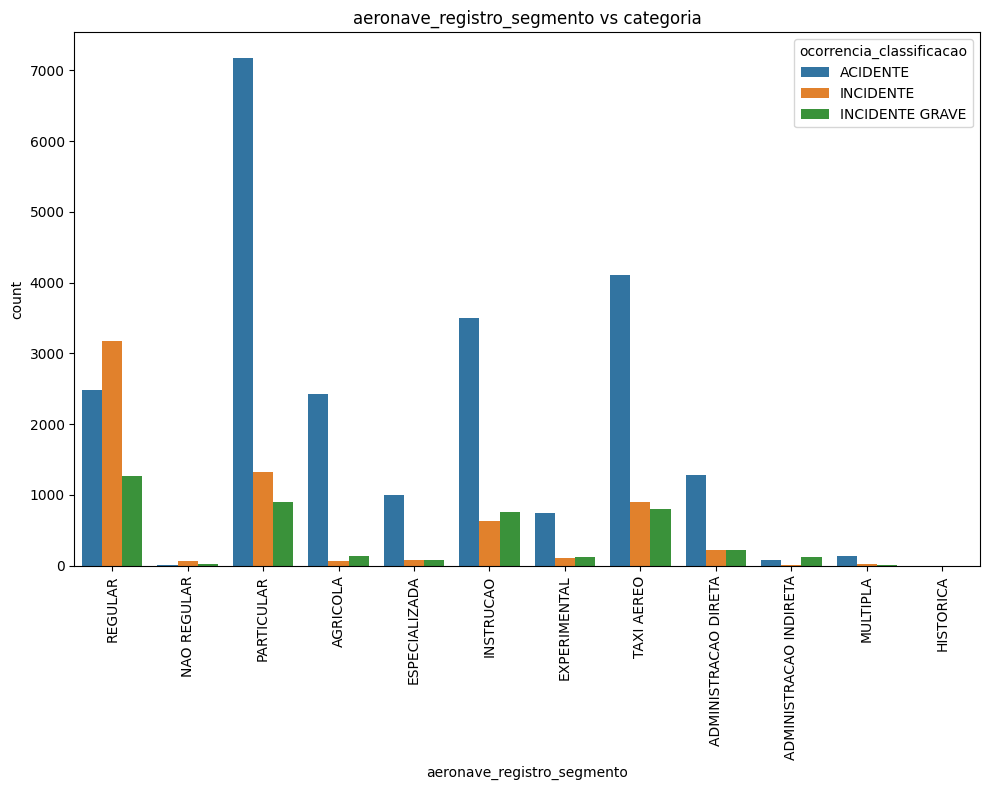

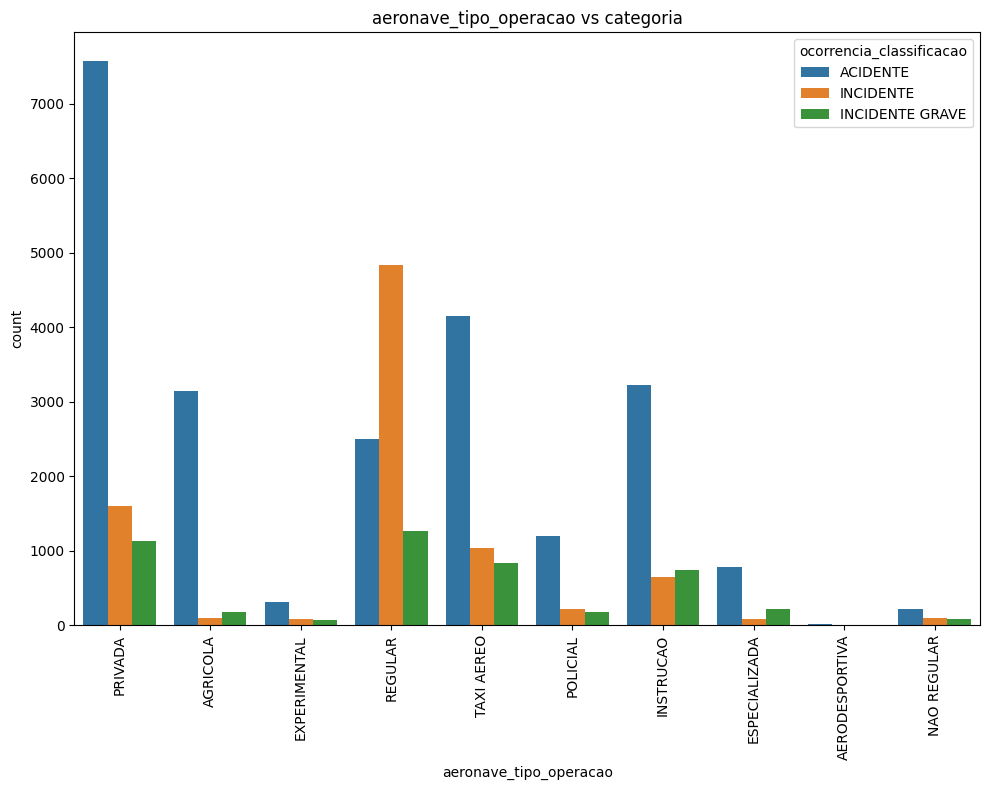

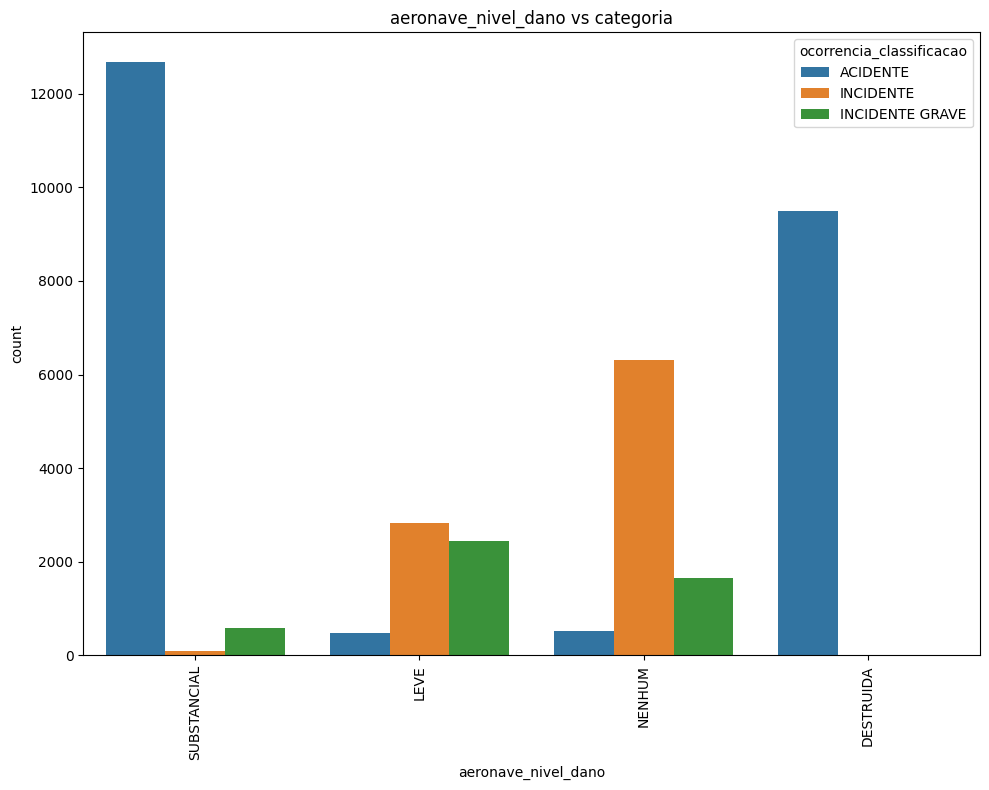

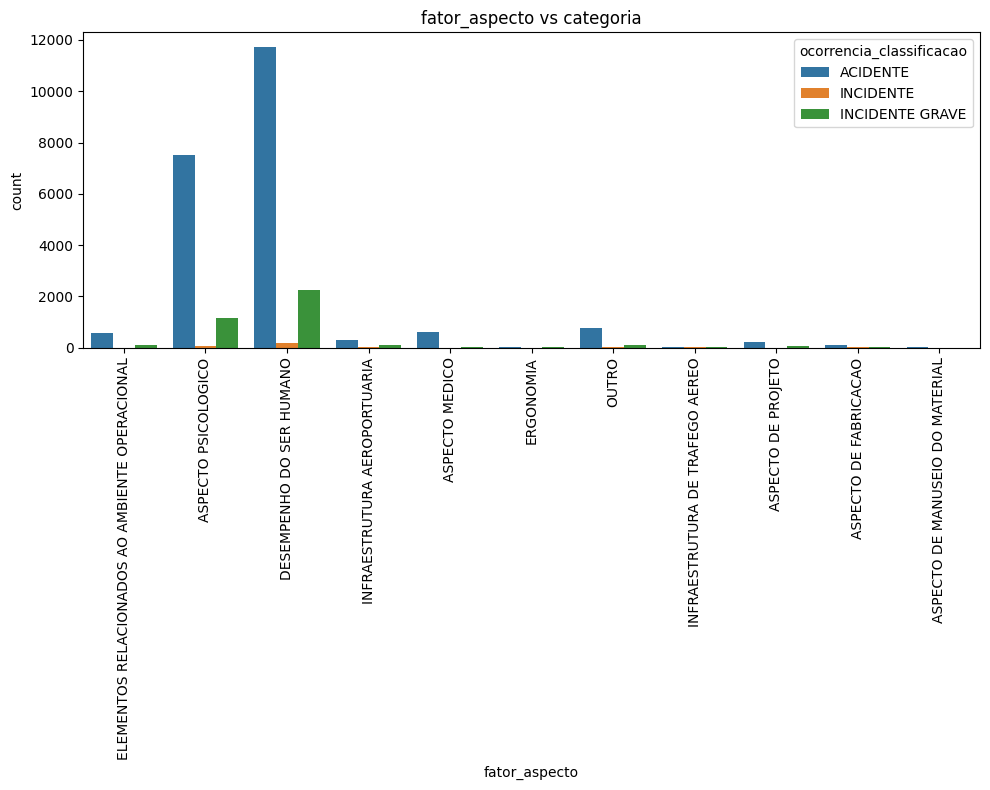

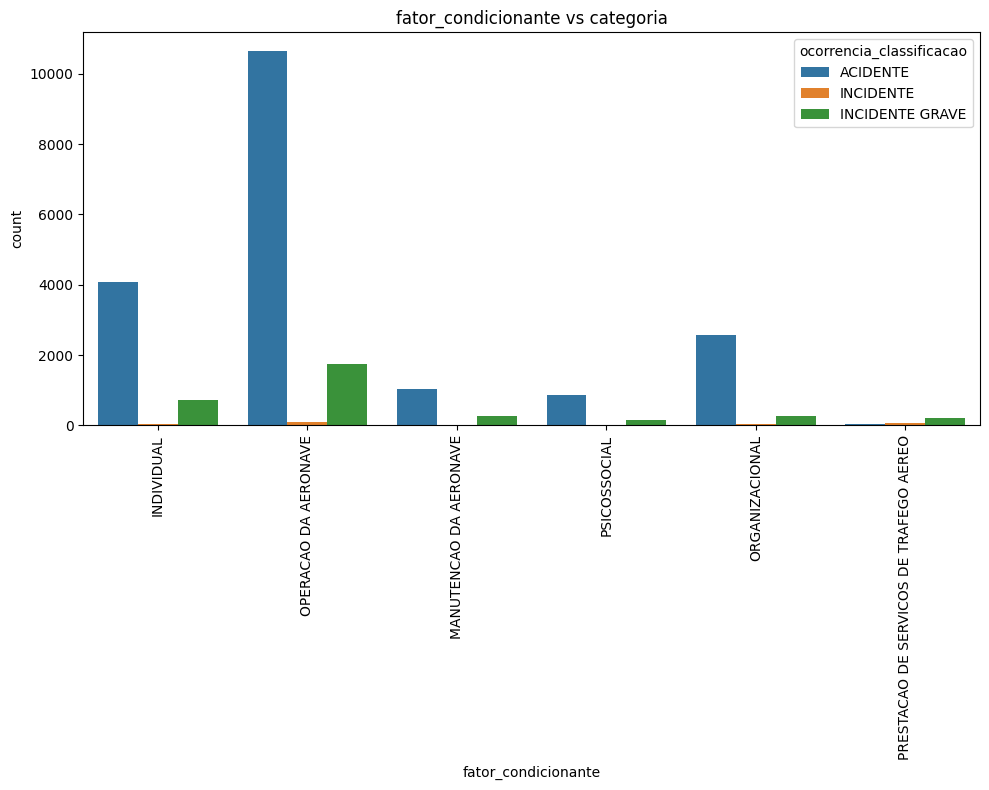

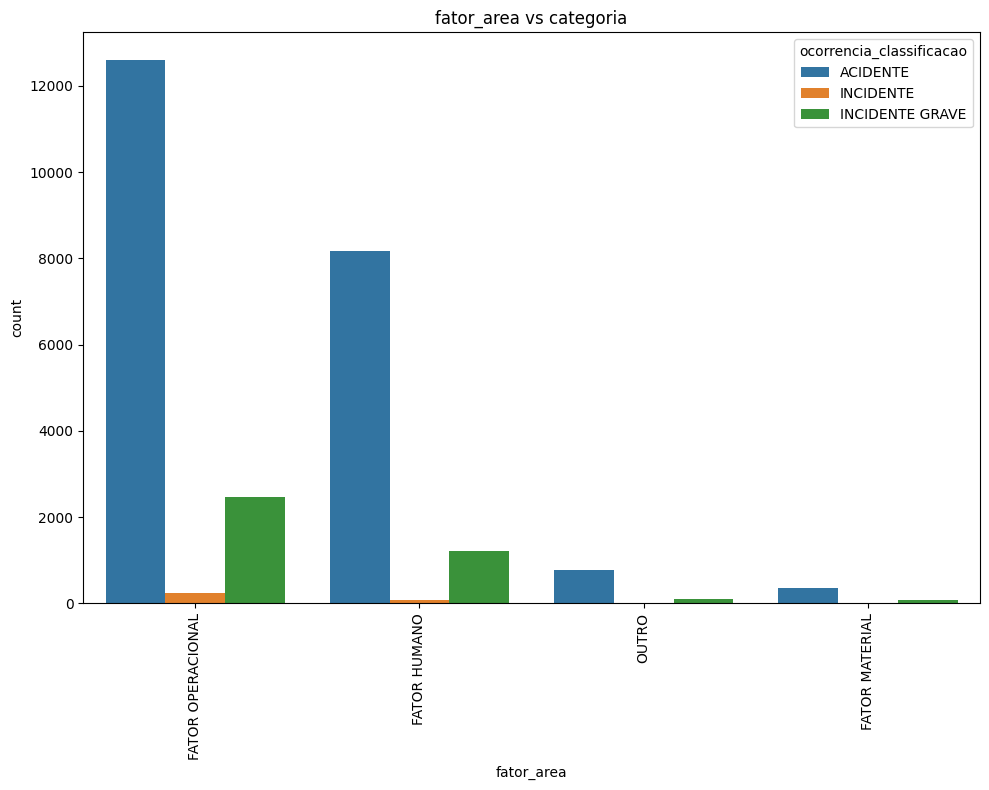

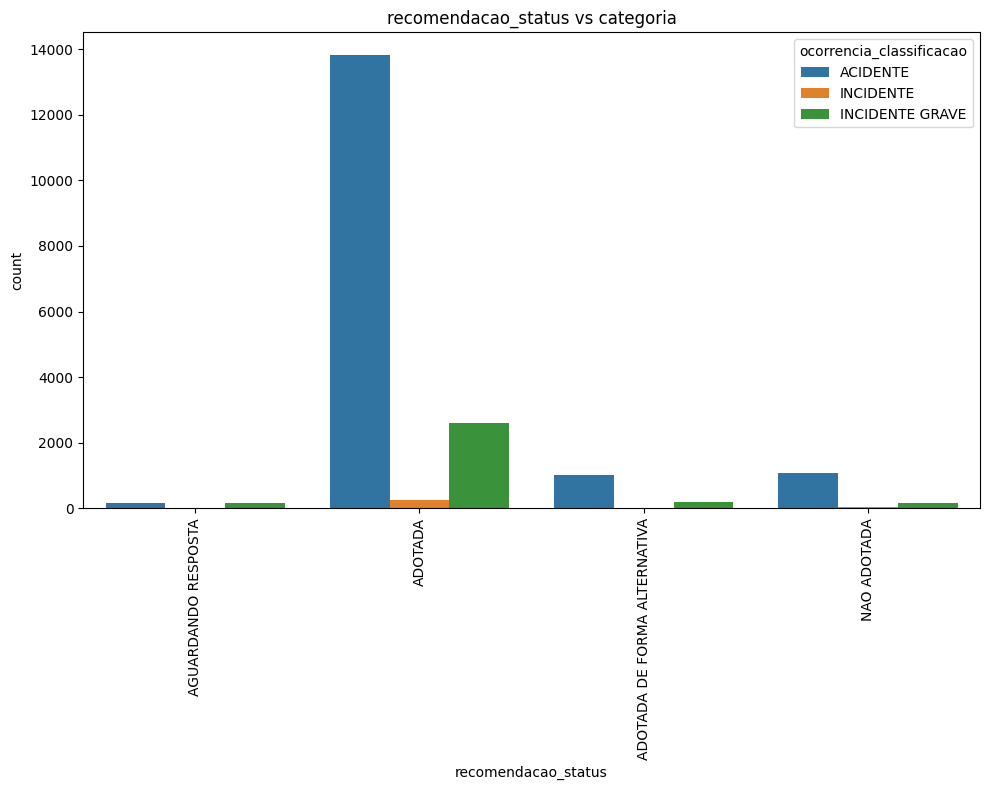

In [104]:
# Relação entre Variáveis Categóricas e a Categoria-Alvo: Vamos observar como as categorias de cada variável se distribuem por classe.
for col in colunas_categoricas:
    if df_merged[col].nunique() < 20:
        plt.figure(figsize=(10, 8))
        sns.countplot(data=df_merged, x=col, hue='ocorrencia_classificacao')
        plt.title(f'{col} vs categoria')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

In [105]:
# Cardinalidade de Variáveis Categóricas: Ver quantas categorias existem em cada variável e sugerir agrupamento de menos frequentes.
for col in colunas_categoricas:
    print(f'{col}: {df_merged[col].nunique()} categorias')
    print(df_merged[col].value_counts().tail())
    print('-' * 40)

ocorrencia_classificacao: 3 categorias
ocorrencia_classificacao
ACIDENTE           23268
INCIDENTE           9572
INCIDENTE GRAVE     4809
Name: count, dtype: int64
----------------------------------------
ocorrencia_latitude: 3699 categorias
ocorrencia_latitude
-31.131528         1
-16.48388888888    1
-15.83694444444    1
-11.87555555555    1
-29.08555569444    1
Name: count, dtype: int64
----------------------------------------
ocorrencia_longitude: 3706 categorias
ocorrencia_longitude
-46.23888888888    1
-55.816667         1
-53.86555555555    1
-35.96972222222    1
-49.00666666666    1
Name: count, dtype: int64
----------------------------------------
ocorrencia_cidade: 1426 categorias
ocorrencia_cidade
VOLTA REDONDA           1
URANDI                  1
VALENI12A DO PIAUI12    1
JANUI12RIA              1
JAGUAPITI12             1
Name: count, dtype: int64
----------------------------------------
ocorrencia_uf: 27 categorias
ocorrencia_uf
SE    255
RO    230
RN    203
PB    102
A

Ocorrencias por Estado

<Axes: title={'center': 'Ocorrências por Estado'}, xlabel='Estado', ylabel='Quantidade de Ocorrências'>

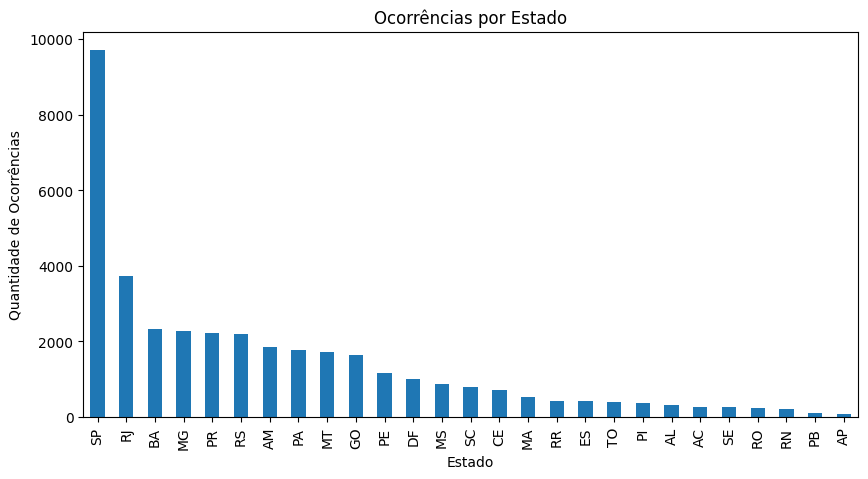

In [106]:
df_merged['ocorrencia_uf'].value_counts().plot(kind='bar', title='Ocorrências por Estado', xlabel='Estado', ylabel='Quantidade de Ocorrências',figsize=(10, 5))


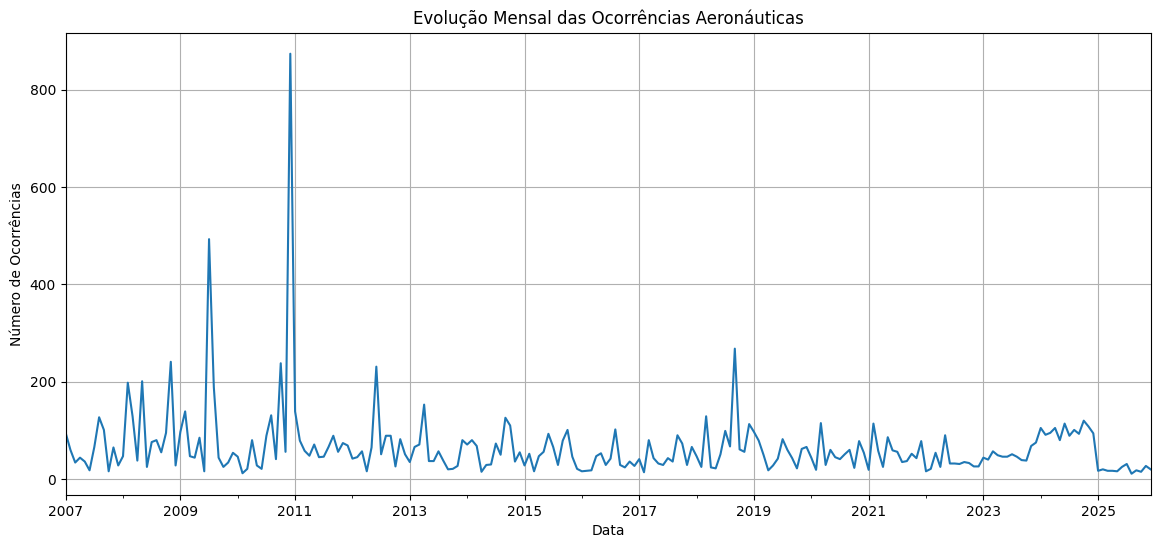

In [107]:
df_merged['ocorrencia_dia'] = pd.to_datetime(df_merged['ocorrencia_dia'], errors='coerce')

plt.figure(figsize=(14, 6))
df_merged.set_index('ocorrencia_dia').resample('ME').size().plot()
plt.title('Evolução Mensal das Ocorrências Aeronáuticas')
plt.xlabel('Data')
plt.ylabel('Número de Ocorrências')
plt.grid()
plt.show()

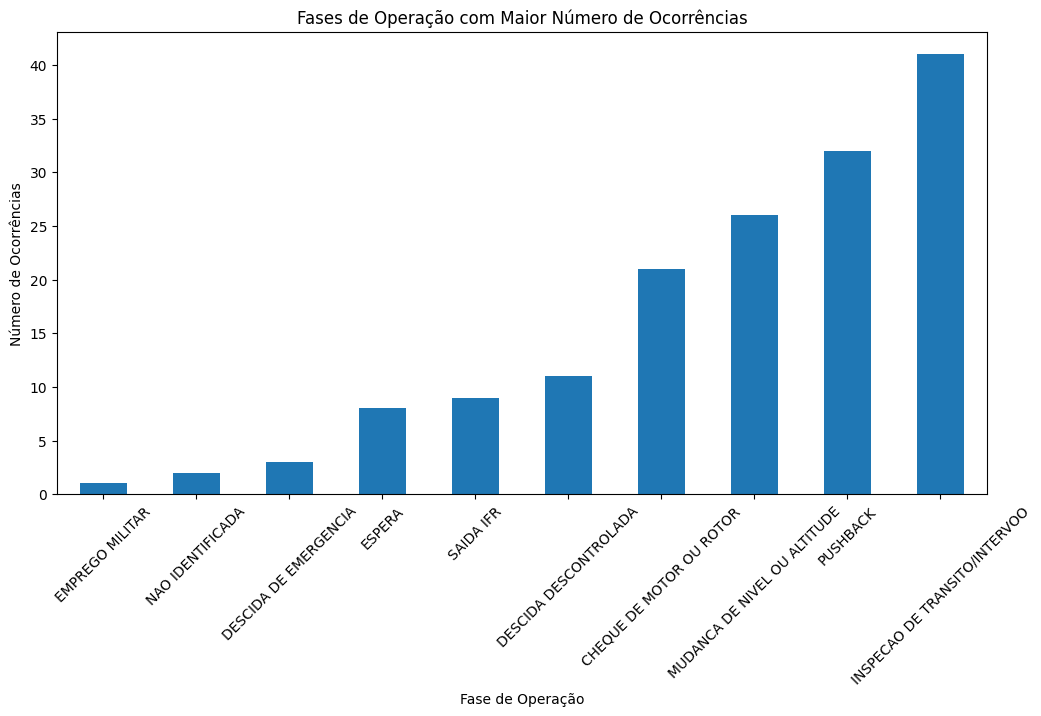

In [108]:
plt.figure(figsize=(12, 6))
df_merged['aeronave_fase_operacao'].value_counts().sort_values().head(10).plot(kind='bar')
plt.title('Fases de Operação com Maior Número de Ocorrências')
plt.xlabel('Fase de Operação')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.show()

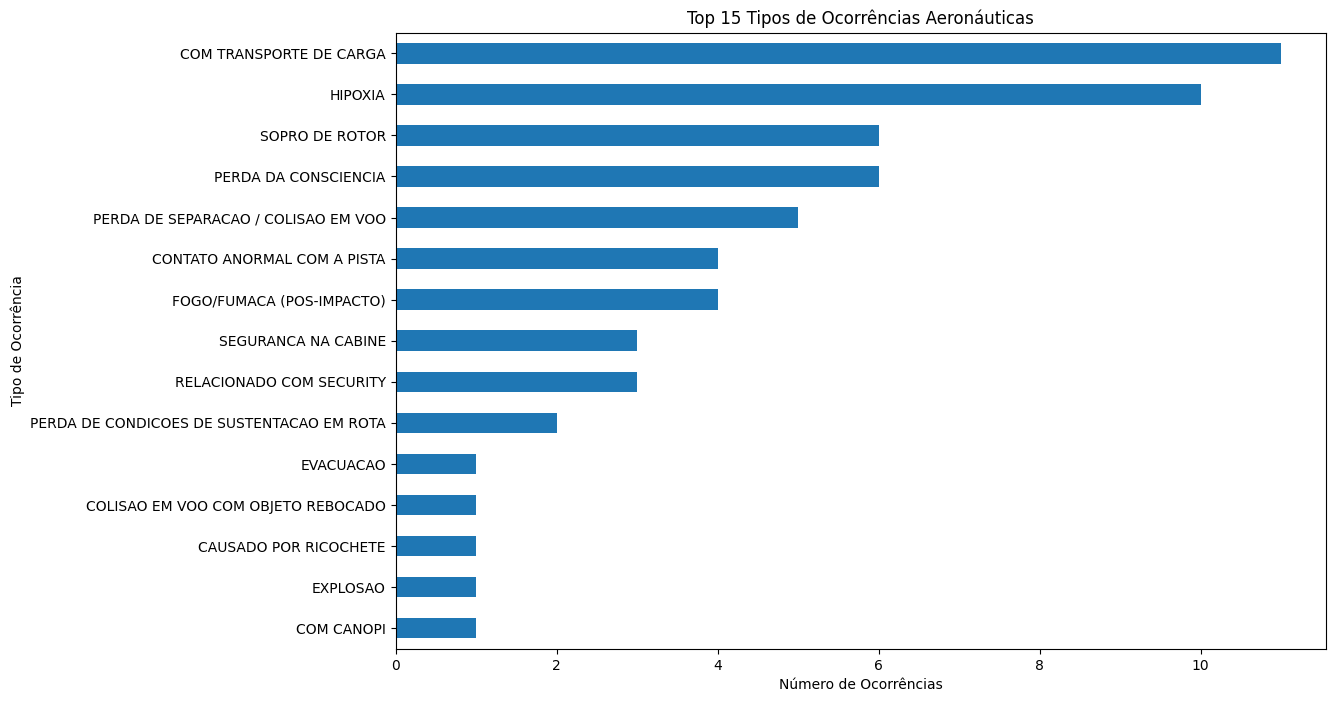

In [109]:
plt.figure(figsize=(12, 8))
df_merged['ocorrencia_tipo'].value_counts(ascending=True).head(15).plot(kind='barh')
plt.title('Top 15 Tipos de Ocorrências Aeronáuticas')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Tipo de Ocorrência')
plt.show()

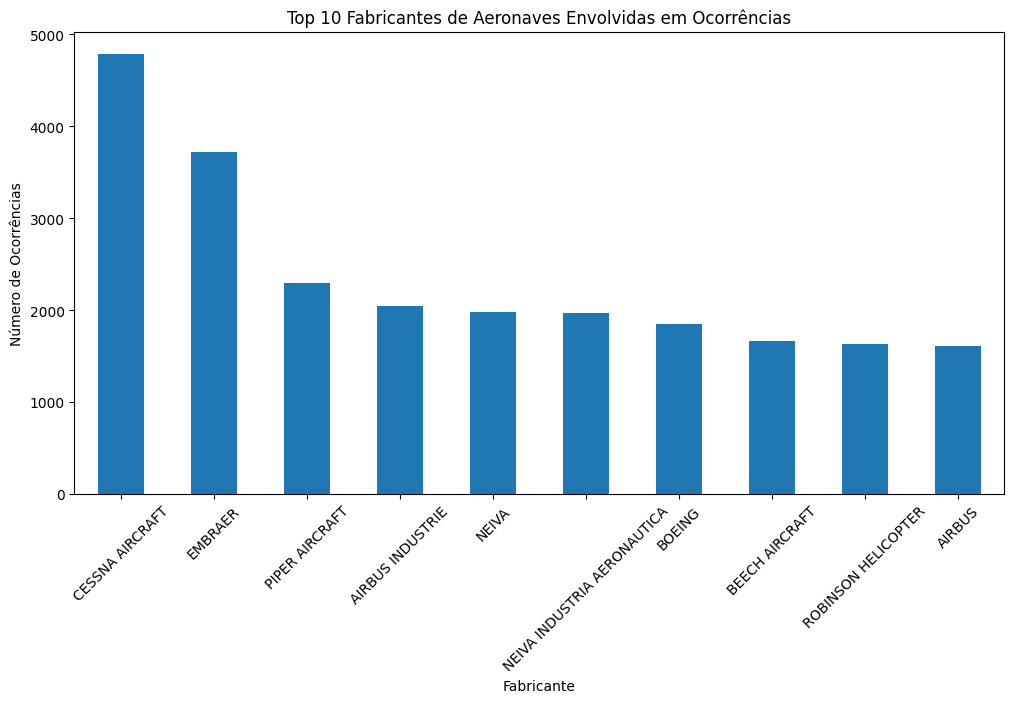

In [110]:
plt.figure(figsize=(12, 6))
df_merged['aeronave_fabricante'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Fabricantes de Aeronaves Envolvidas em Ocorrências')
plt.xlabel('Fabricante')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.show()

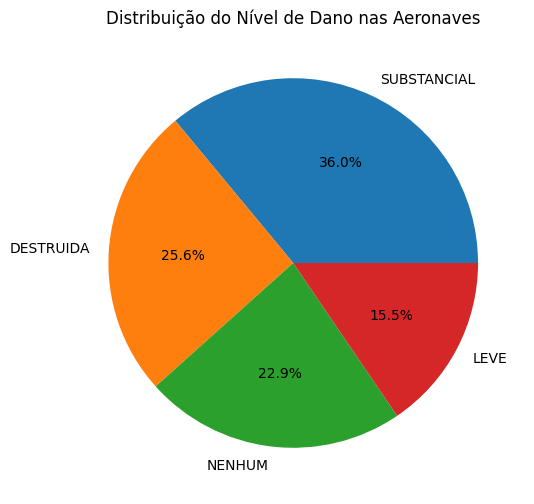

In [111]:
plt.figure(figsize=(10, 6))
df_merged['aeronave_nivel_dano'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição do Nível de Dano nas Aeronaves')
plt.ylabel('')
plt.show()

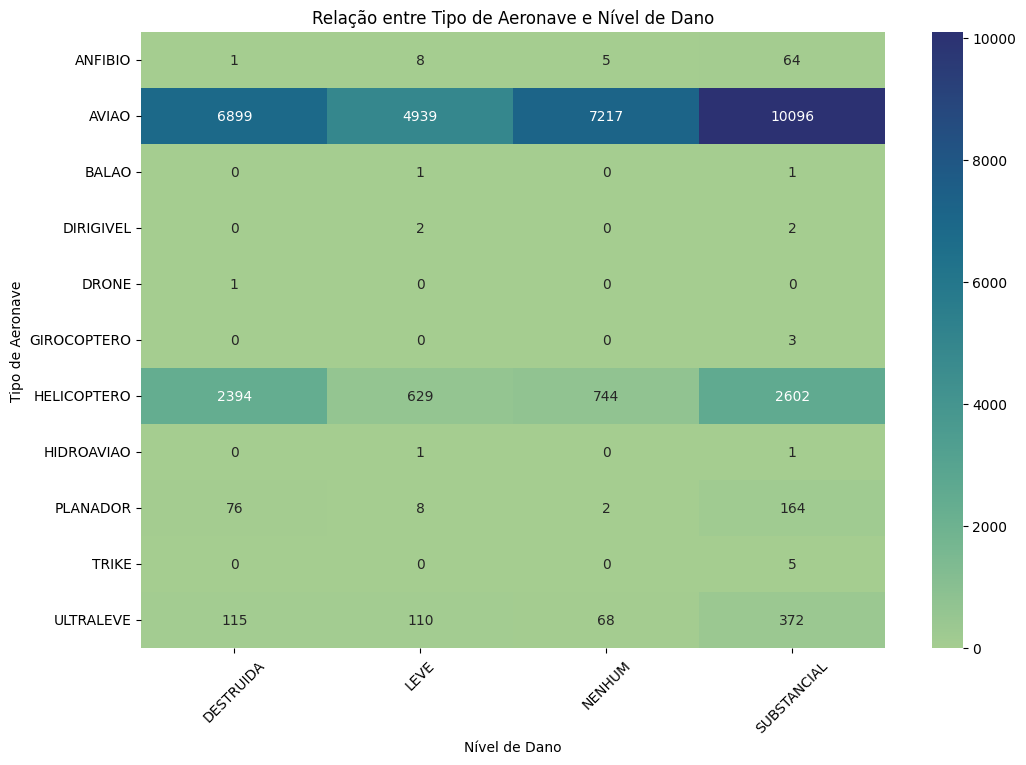

In [112]:

plt.figure(figsize=(12, 8))
cross_tab = pd.crosstab(df_merged['aeronave_tipo_veiculo'], df_merged['aeronave_nivel_dano'])
sns.heatmap(cross_tab, cmap='crest', annot=True, fmt='d')
plt.title('Relação entre Tipo de Aeronave e Nível de Dano')
plt.xlabel('Nível de Dano')
plt.ylabel('Tipo de Aeronave')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


idade_aeronave
Velho (<1990)                15795
Intermediário (1990-2009)    14975
Novo (2010+)                  5790
Name: count, dtype: int64


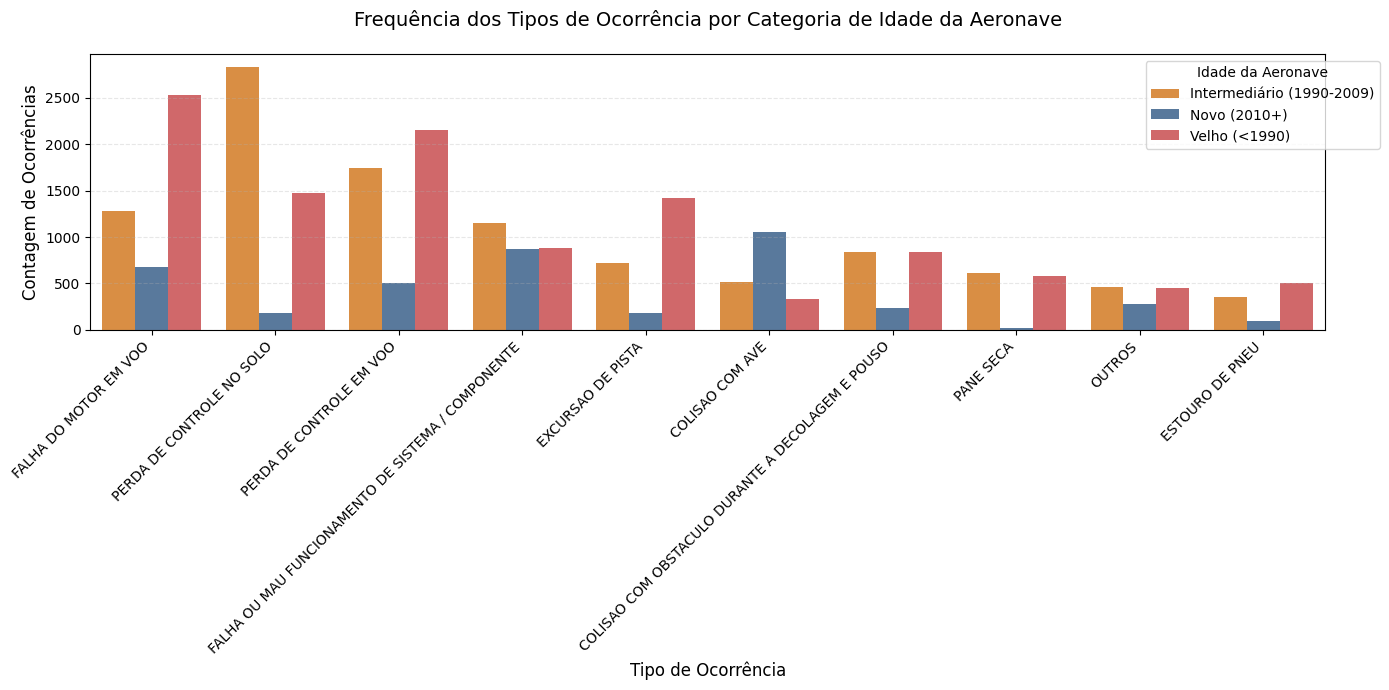

In [113]:

# Criar categorias baseadas no ano de fabricação
def categorizar_idade(ano):
    if pd.isna(ano):
        return None
    ano = int(ano)
    if ano >= 2010:
        return 'Novo (2010+)'
    elif ano >= 1990:
        return 'Intermediário (1990-2009)'
    else:
        return 'Velho (<1990)'

# Aplicar a categorização
df_merged['idade_aeronave'] = df_merged['aeronave_ano_fabricacao'].apply(categorizar_idade)

# Verificar a distribuição
print(df_merged['idade_aeronave'].value_counts())

# Filtrar os 5 tipos mais comuns de ocorrência
top_5_ocorrencias = df_merged['ocorrencia_tipo'].value_counts().head(10).index
df_top = df_merged[df_merged['ocorrencia_tipo'].isin(top_5_ocorrencias)].dropna(subset=['idade_aeronave'])

# Configurar o gráfico
plt.figure(figsize=(14, 7))
sns.countplot(data=df_top, 
              x='ocorrencia_tipo', 
              hue='idade_aeronave',
              palette={'Novo (2010+)': '#4e79a7', 
                       'Intermediário (1990-2009)': '#f28e2b', 
                       'Velho (<1990)': '#e15759'},
              order=top_5_ocorrencias)

# Ajustes estéticos
plt.title('Frequência dos Tipos de Ocorrência por Categoria de Idade da Aeronave', pad=20, fontsize=14)
plt.xlabel('Tipo de Ocorrência', fontsize=12)
plt.ylabel('Contagem de Ocorrências', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Idade da Aeronave', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()